#데이터 전처리

In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 23 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#한글폰트 런타임 다시 시작
plt.rc('font',family = 'NanumBarunGothic')

In [4]:
def change_dtype_sort(df):
    df['날짜']=pd.to_datetime(df['날짜'])
    df.sort_values(by='날짜',inplace=True)
    df.reset_index(drop=True,inplace=True)
    df.columns=['', '종가', '오픈', '고가', '저가', '거래량','변동 %']
    df.set_index('',inplace=True)
    return df

def make_date_freq_null_processing(df):

    df=df.asfreq('D')
    df['종가'].fillna(method='ffill',inplace=True)
    df['거래량'].fillna(0,inplace=True)
    df['변동 %'].fillna(0,inplace=True)

    for idx in df.index:
        for col in ['오픈','고가','저가']:
            if pd.notnull(df.loc[idx,col])==True:
                pass
            else:
                df.loc[idx,col]=df.loc[idx,'종가']
    return df


In [5]:
SM_ent=pd.read_csv('./SM_ent.csv')
SM_ent

,날짜,종가,오픈,고가,저가,거래량,변동 %
0,2023- 03- 16,111600.0,112200.0,113900.0,111300.0,961000.0,-1.59
1,2023- 03- 15,113400.0,114600.0,116300.0,113400.0,320.0,-1.56
2,2023- 03- 14,115200.0,114400.0,118000.0,112500.0,2450000.0,1.86
3,2023- 03- 13,113100.0,134300.0,134300.0,111500.0,770.0,-23.48
4,2023- 03- 12,147800.0,147800.0,147800.0,147800.0,0.0,0.00
...,...,...,...,...,...,...,...
2437,2014- 03- 20,47800.0,46550.0,49050.0,45800.0,1490000.0,-3.92
2438,2014- 03- 19,49750.0,51000.0,51300.0,49650.0,199280.0,-2.45
2439,2014- 03- 18,51000.0,50100.0,51100.0,49250.0,249080.0,2.00
2440,2014- 03- 17,50000.0,51500.0,51600.0,48550.0,517680.0,-3.29


In [6]:
SM_ent = change_dtype_sort(SM_ent)
SM_ent = make_date_freq_null_processing(SM_ent)

In [7]:
JYP_ent=pd.read_csv('./JYP_ent.csv')
JYP_ent.head()

,날짜,종가,오픈,고가,저가,거래량,변동 %
0,2023-03-16,69800.0,71100.0,71200.0,68500.0,646620.0,-2.65
1,2023-03-15,71700.0,72400.0,72700.0,70700.0,495310.0,0.28
2,2023-03-14,71500.0,72100.0,72800.0,71100.0,561310.0,0.56
3,2023-03-13,71100.0,74900.0,75200.0,70500.0,50.0,-8.49
4,2023-03-12,77700.0,77700.0,77700.0,77700.0,0.0,0.00


In [8]:
JYP_ent=change_dtype_sort(JYP_ent)
JYP_ent=make_date_freq_null_processing(JYP_ent)

In [9]:
YG_ent=pd.read_csv('./YG_ent.csv')
YG_ent.head()

,날짜,종가,오픈,고가,저가,거래량,변동 %
0,2023- 03- 16,51900.0,52200.0,52800.0,51300.0,274290.0,-1.70
1,2023- 03- 15,52800.0,54200.0,54600.0,52100.0,441790.0,-0.75
2,2023- 03- 14,53200.0,55000.0,55000.0,52800.0,420750.0,-2.56
3,2023- 03- 13,54600.0,56200.0,56400.0,53500.0,30.0,-5.04
4,2023- 03- 12,57500.0,57500.0,57500.0,57500.0,0.0,0.00


In [10]:
YG_ent=change_dtype_sort(YG_ent)
YG_ent=make_date_freq_null_processing(YG_ent)

In [11]:
!pip install skforecast

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 343.8/343.8 KB 24.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 365.3/365.3 KB 33.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 KB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.2/212.2 KB 21.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 KB 8.6 MB/s eta 0:00:00
  Attempting uninstall: tqdm
    Found existing installation: tqdm 4.65.0
    Uninstalling tqdm-4.65.0:
      Successfully uninstalled tqdm-4.65.0


# 모델훈련,예측

In [12]:
from xgboost import XGBRegressor
from skforecast.ForecasterAutoreg import ForecasterAutoreg
from sklearn.metrics import mean_squared_error

In [13]:
sm_train=SM_ent.iloc[:round(len(SM_ent)*0.90)]
sm_test=SM_ent.iloc[round(len(SM_ent)*0.90):]
jyp_train=JYP_ent.iloc[:round(len(JYP_ent)*0.90)]
jyp_test=JYP_ent.iloc[round(len(JYP_ent)*0.90):]
yg_train=YG_ent.iloc[:round(len(YG_ent)*0.90)]
yg_test=YG_ent.iloc[round(len(YG_ent)*0.90):]

### SM

In [14]:
forecaster = ForecasterAutoreg(
                    regressor = XGBRegressor(),
                    lags = 15
             )

forecaster.fit(y=sm_train.iloc[:,0],exog=sm_train.iloc[:,1:])
forecaster

ForecasterAutoreg 
Regressor: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...) 
Lags: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15] 
Transformer for y: None 
Transformer for exog: None 
Window size: 15 
Weight function included: False 
Exogenous included: True 
Type of exogenous variable: <class 'pandas.co

In [15]:
sm_predict=forecaster.predict(steps=len(sm_test), exog=sm_test.iloc[:,1:])
sm_predict

2022-04-22    68617.625000
2022-04-23    69408.664062
2022-04-24    69250.156250
2022-04-25    68226.625000
2022-04-26    69648.656250
                  ...     
2023-03-12    83679.726562
2023-03-13    83431.078125
2023-03-14    83545.289062
2023-03-15    83473.664062
2023-03-16    83536.937500
Freq: D, Name: pred, Length: 329, dtype: float64

In [16]:
sm_test.iloc[:,0]


2022-04-22     68900.0
2022-04-23     68900.0
2022-04-24     68900.0
2022-04-25     67500.0
2022-04-26     68600.0
                ...   
2023-03-12    147800.0
2023-03-13    113100.0
2023-03-14    115200.0
2023-03-15    113400.0
2023-03-16    111600.0
Freq: D, Name: 종가, Length: 329, dtype: float64

In [17]:
error_mse = mean_squared_error(
                y_true = sm_test.iloc[:,0],
                y_pred = sm_predict
            )
print(f"Test error (mse): {error_mse}")

Test error (mse): 226189256.5982544


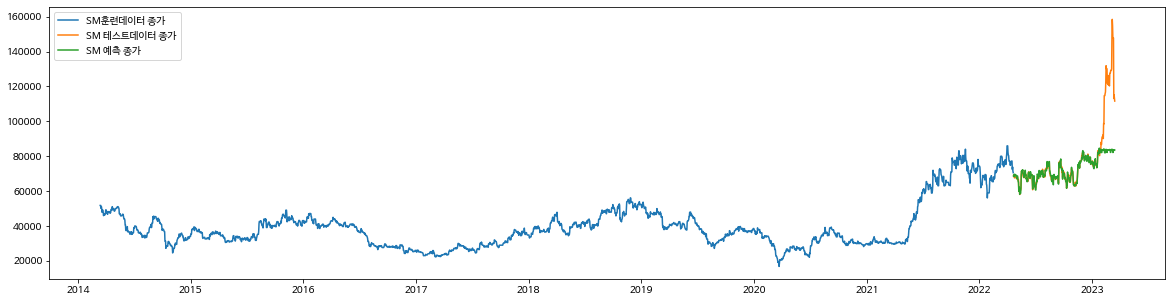

In [18]:
plt.figure(figsize=(20,5))
plt.plot(sm_train.iloc[:,0],label='SM훈련데이터 종가')
plt.plot(sm_test.iloc[:,0],label='SM 테스트데이터 종가')
plt.plot(sm_predict,label='SM 예측 종가')
plt.legend()
plt.savefig('SM주가데이터xgboost.png')
plt.show()

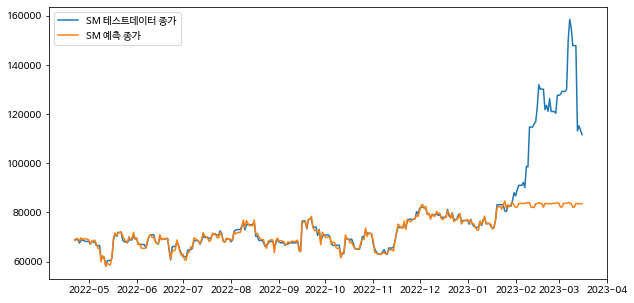

In [19]:
plt.figure(figsize=(10,5))
plt.plot(sm_test.iloc[:,0],label='SM 테스트데이터 종가')
plt.plot(sm_predict,label='SM 예측 종가')
plt.legend()
plt.savefig('SM주가데이터xgboost확대.png')
plt.show()

### JYP

In [20]:
forecaster = ForecasterAutoreg(
                    regressor = XGBRegressor(),
                    lags = 15
             )

forecaster.fit(y=jyp_train.iloc[:,0],exog=jyp_train.iloc[:,1:])
forecaster

ForecasterAutoreg 
Regressor: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...) 
Lags: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15] 
Transformer for y: None 
Transformer for exog: None 
Window size: 15 
Weight function included: False 
Exogenous included: True 
Type of exogenous variable: <class 'pandas.co

In [21]:
jyp_predict=forecaster.predict(steps=len(jyp_test), exog=sm_test.iloc[:,1:])
jyp_predict

2022-04-22    63569.792969
2022-04-23    64493.429688
2022-04-24    64512.519531
2022-04-25    63619.179688
2022-04-26    64515.652344
                  ...     
2023-03-12    63633.585938
2023-03-13    63560.484375
2023-03-14    64515.859375
2023-03-15    63590.039062
2023-03-16    63605.597656
Freq: D, Name: pred, Length: 329, dtype: float64

In [22]:
error_mse = mean_squared_error(
                y_true = jyp_test.iloc[:,0],
                y_pred = jyp_predict
            )
print(f"Test error (mse): {error_mse}")

Test error (mse): 56851046.103044085


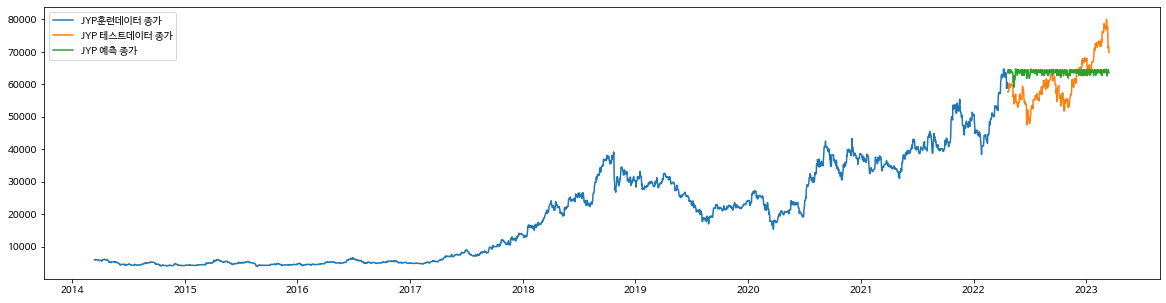

In [23]:
plt.figure(figsize=(20,5))
plt.plot(jyp_train.iloc[:,0],label='JYP훈련데이터 종가')
plt.plot(jyp_test.iloc[:,0],label='JYP 테스트데이터 종가')
plt.plot(jyp_predict,label='JYP 예측 종가')
plt.legend()
plt.savefig('JYP주가데이터xgboost.png')
plt.show()

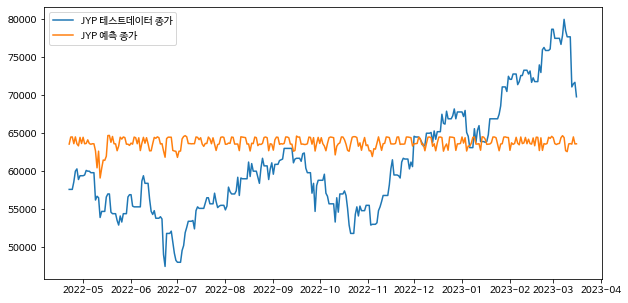

In [24]:
plt.figure(figsize=(10,5))
plt.plot(jyp_test.iloc[:,0],label='JYP 테스트데이터 종가')
plt.plot(jyp_predict,label='JYP 예측 종가')
plt.legend()
plt.savefig('JYP주가데이터xgboost확대대.png')
plt.show()

### YG

In [25]:
forecaster = ForecasterAutoreg(
                    regressor = XGBRegressor(),
                    lags = 15
             )

forecaster.fit(y=yg_train.iloc[:,0],exog=yg_train.iloc[:,1:])
forecaster

ForecasterAutoreg 
Regressor: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...) 
Lags: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15] 
Transformer for y: None 
Transformer for exog: None 
Window size: 15 
Weight function included: False 
Exogenous included: True 
Type of exogenous variable: <class 'pandas.co

In [26]:
yg_predict=forecaster.predict(steps=len(yg_test), exog=yg_test.iloc[:,1:])
yg_predict

2022-04-22    56359.015625
2022-04-23    56666.503906
2022-04-24    56824.574219
2022-04-25    55739.625000
2022-04-26    57608.437500
                  ...     
2023-03-12    57789.871094
2023-03-13    53655.921875
2023-03-14    53841.046875
2023-03-15    53198.132812
2023-03-16    51558.320312
Freq: D, Name: pred, Length: 329, dtype: float64

In [27]:
error_mse = mean_squared_error(
                y_true = yg_test.iloc[:,0],
                y_pred = yg_predict
            )
print(f"Test error (mse): {error_mse}")

Test error (mse): 222073.20398380546


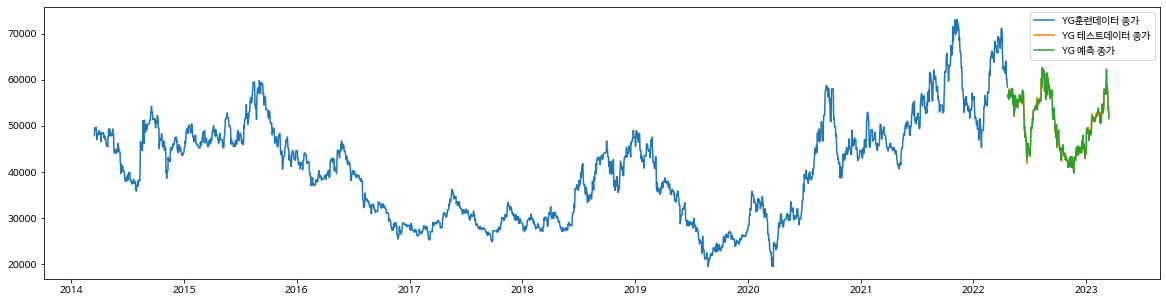

In [28]:
plt.figure(figsize=(20,5))
plt.plot(yg_train.iloc[:,0],label='YG훈련데이터 종가')
plt.plot(yg_test.iloc[:,0],label='YG 테스트데이터 종가')
plt.plot(yg_predict,label='YG 예측 종가')
plt.legend()
plt.savefig('YG주가데이터xgboost.png')
plt.show()

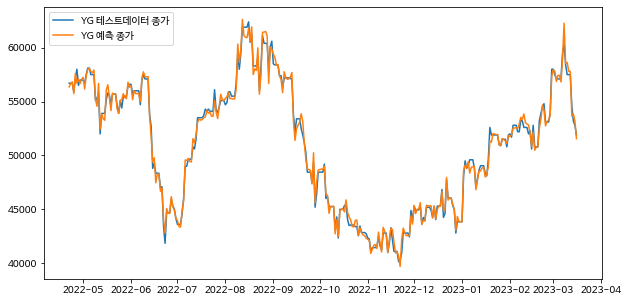

In [29]:
plt.figure(figsize=(10,5))
plt.plot(yg_test.iloc[:,0],label='YG 테스트데이터 종가')
plt.plot(yg_predict,label='YG 예측 종가')
plt.legend()
plt.savefig('YG주가데이터xgboost확대대.png')
plt.show()

#하이퍼파라미터설정, 그리드서치 적용


In [30]:
from skforecast.model_selection import grid_search_forecaster
from sklearn.metrics import mean_squared_error

### SM

In [31]:
valid_len=(len(sm_train)-round(len(sm_train)*0.8))
valid_len

592

In [32]:
#steps 수 정하기기
for i in range(1,20):
  if valid_len%i==0:
    print(i)

1
2
4
8
16


In [33]:
forecaster = ForecasterAutoreg(
                    regressor = XGBRegressor(),
                    lags = 8
             )
#하이퍼파라미터 설정하기
lags_grid=range(12,20,2)#12,14,16,18 4개
param_grid={
    'n_estimators':[50,100],#2개
    'learning_rate':[0.1,0.01,0.001] #3개
}
#모델 개수:4*2*3=24개
results_grid = grid_search_forecaster(
                        forecaster=forecaster,
                        y=sm_train.iloc[:,0],
                        exog=sm_train.iloc[:,1:],
                        lags_grid=lags_grid,
                        param_grid=param_grid,
                        initial_train_size=round(len(sm_train)*0.8),
                        metric= 'mean_squared_error',
                        steps       = 8,
                        refit       = True,#예측한 step 훈련데이터에 포함
                        fixed_train_size   = True,#검증용 step 예측에 쓰이는 훈련데이터 개수 고정
                        return_best = True,
                        verbose     = False
               )


Number of models compared: 24.


loop param_grid:   0%|                                              | 0/6 [00:00<?, ?it/s]/usr/local/lib/python3.9/dist-packages/skforecast/model_selection/model_selection.py:370: RuntimeWarning: The forecaster will be fit 74 times. This can take substantial amounts of time. If not feasible, try with `refit = False`. 

  warnings.warn(

loop lags_grid: 100%|██████████████████████████████████████| 4/4 [10:21<00:00, 155.49s/it]


`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [ 1  2  3  4  5  6  7  8  9 10 11 12] 
  Parameters: {'learning_rate': 0.1, 'n_estimators': 100}
  Backtesting metric: 1750568.1920586084



In [ ]:
results_grid

In [ ]:
forecaster

In [ ]:
sm_predict=forecaster.predict(steps=len(sm_test), exog=sm_test.iloc[:,1:])
sm_predict

In [37]:
error_mse = mean_squared_error(
                y_true = sm_test.iloc[:,0],
                y_pred = sm_predict
            )
print(f"Test error (mse): {error_mse}")

Test error (mse): 218410162.6838118


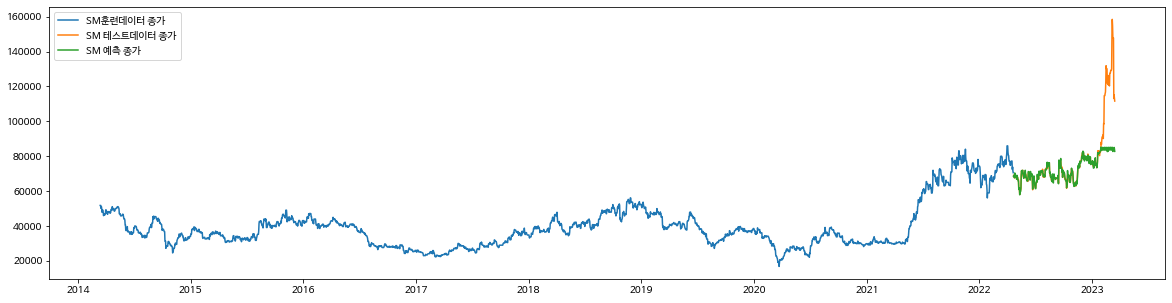

In [46]:
plt.figure(figsize=(20,5))
plt.plot(sm_train.iloc[:,0],label='SM훈련데이터 종가')
plt.plot(sm_test.iloc[:,0],label='SM 테스트데이터 종가')
plt.plot(sm_predict,label='SM 예측 종가')
plt.legend()
plt.savefig('SM주가데이터xgboost_그리드서치.png')
plt.show()

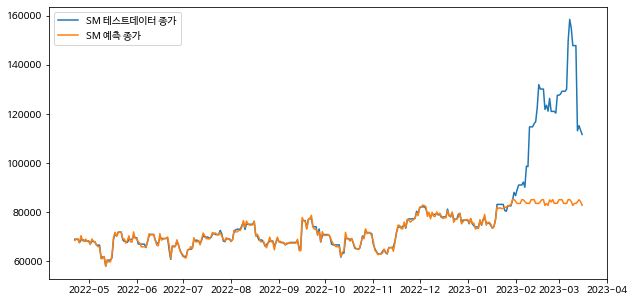

In [56]:
plt.figure(figsize=(10,5))
plt.plot(sm_test.iloc[:,0],label='SM 테스트데이터 종가')
plt.plot(sm_predict,label='SM 예측 종가')
plt.legend()
plt.savefig('SM주가데이터xgboost_그리드서치확대.png')
plt.show()

### JYP

In [39]:
forecaster = ForecasterAutoreg(
                    regressor = XGBRegressor(),
                    lags = 8
             )
#하이퍼파라미터 설정하기
lags_grid=range(12,20,2)#12,14,16,18 4개
param_grid={
    'n_estimators':[50,100],#2개
    'learning_rate':[0.1,0.01,0.001] #3개
}
#모델 개수:4*2*3=24개
results_grid = grid_search_forecaster(
                        forecaster=forecaster,
                        y=jyp_train.iloc[:,0],
                        exog=jyp_train.iloc[:,1:],
                        lags_grid=lags_grid,
                        param_grid=param_grid,
                        initial_train_size=round(len(jyp_train)*0.8),
                        metric= 'mean_squared_error',
                        steps       = 8,
                        refit       = True,#예측한 step 훈련데이터에 포함
                        fixed_train_size   = True,#검증용 step 예측에 쓰이는 훈련데이터 개수 고정
                        return_best = True,
                        verbose     = False
               )


Number of models compared: 24.


loop lags_grid: 100%|██████████████████████████████████████| 4/4 [13:20<00:00, 200.08s/it]


`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14] 
  Parameters: {'learning_rate': 0.1, 'n_estimators': 100}
  Backtesting metric: 1412938.629468905



In [40]:
results_grid

,lags,params,mean_squared_error,learning_rate,n_estimators
7,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]","{'learning_rate': 0.1, 'n_estimators': 100}",1.412939e+06,0.100,100.0
13,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{'learning_rate': 0.1, 'n_estimators': 100}",1.432755e+06,0.100,100.0
19,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{'learning_rate': 0.1, 'n_estimators': 100}",1.467211e+06,0.100,100.0
1,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]","{'learning_rate': 0.1, 'n_estimators': 100}",1.484554e+06,0.100,100.0
6,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]","{'learning_rate': 0.1, 'n_estimators': 50}",1.807090e+06,0.100,50.0
12,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{'learning_rate': 0.1, 'n_estimators': 50}",1.823548e+06,0.100,50.0
18,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{'learning_rate': 0.1, 'n_estimators': 50}",1.876166e+06,0.100,50.0
0,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]","{'learning_rate': 0.1, 'n_estimators': 50}",1.919985e+06,0.100,50.0
21,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{'learning_rate': 0.01, 'n_estimators': 100}",2.811463e+08,0.010,100.0
9,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]","{'learning_rate': 0.01, 'n_estimators': 100}",2.812097e+08,0.010,100.0


In [41]:
forecaster

ForecasterAutoreg 
Regressor: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...) 
Lags: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14] 
Transformer for y: None 
Transformer for exog: None 
Window size: 14 
Weight function included: False 
Exogenous included: True 
Type of exogenous variable: <class 'pandas.core.f

In [42]:
jyp_predict=forecaster.predict(steps=len(jyp_test), exog=jyp_test.iloc[:,1:])
jyp_predict

2022-04-22    58666.214844
2022-04-23    59159.902344
2022-04-24    59181.710938
2022-04-25    59183.718750
2022-04-26    60850.984375
                  ...     
2023-03-12    64233.441406
2023-03-13    63634.906250
2023-03-14    63736.773438
2023-03-15    63724.960938
2023-03-16    62924.753906
Freq: D, Name: pred, Length: 329, dtype: float64

In [44]:
error_mse = mean_squared_error(
                y_true = jyp_test.iloc[:,0],
                y_pred = jyp_predict
            )
print(f"Test error (mse): {error_mse}")

Test error (mse): 19704767.602070816


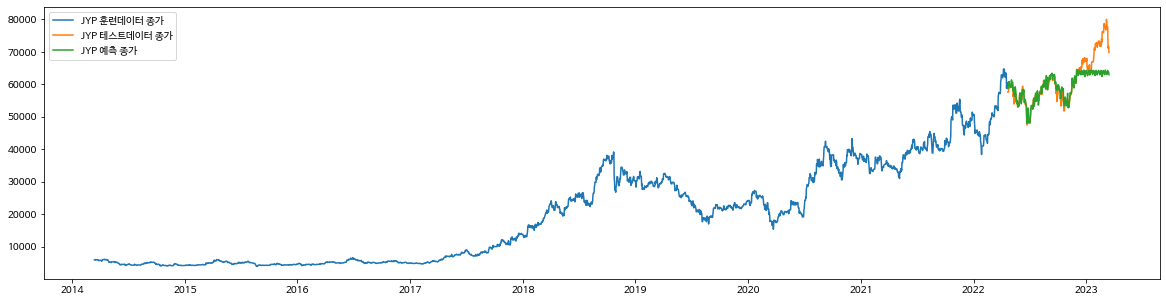

In [47]:
plt.figure(figsize=(20,5))
plt.plot(jyp_train.iloc[:,0],label='JYP 훈련데이터 종가')
plt.plot(jyp_test.iloc[:,0],label='JYP 테스트데이터 종가')
plt.plot(jyp_predict,label='JYP 예측 종가')
plt.legend()
plt.savefig('JYP주가데이터xgboost_그리드서치.png')
plt.show()

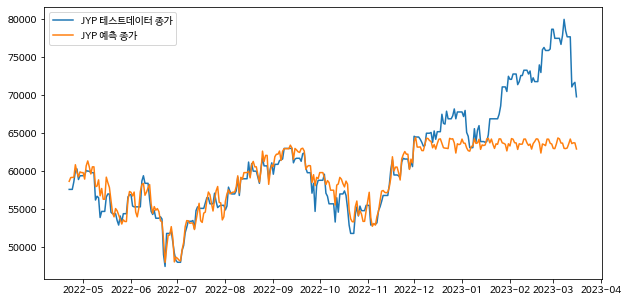

In [55]:
plt.figure(figsize=(10,5))
plt.plot(jyp_test.iloc[:,0],label='JYP 테스트데이터 종가')
plt.plot(jyp_predict,label='JYP 예측 종가')
plt.legend()
plt.savefig('JYP주가데이터xgboost_그리드서치확대.png')
plt.show()

### YG

In [48]:
forecaster = ForecasterAutoreg(
                    regressor = XGBRegressor(),
                    lags = 8
             )
#하이퍼파라미터 설정하기
lags_grid=range(12,20,2)#12,14,16,18 4개
param_grid={
    'n_estimators':[50,100],#2개
    'learning_rate':[0.1,0.01,0.001] #3개
}
#모델 개수:4*2*3=24개
results_grid = grid_search_forecaster(
                        forecaster=forecaster,
                        y=yg_train.iloc[:,0],
                        exog=yg_train.iloc[:,1:],
                        lags_grid=lags_grid,
                        param_grid=param_grid,
                        initial_train_size=round(len(yg_train)*0.8),
                        metric= 'mean_squared_error',
                        steps       = 8,
                        refit       = True,#예측한 step 훈련데이터에 포함
                        fixed_train_size   = True,#검증용 step 예측에 쓰이는 훈련데이터 개수 고정
                        return_best = True,
                        verbose     = False
               )


Number of models compared: 24.


loop lags_grid: 100%|██████████████████████████████████████| 4/4 [10:38<00:00, 159.65s/it]


`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [ 1  2  3  4  5  6  7  8  9 10 11 12] 
  Parameters: {'learning_rate': 0.1, 'n_estimators': 100}
  Backtesting metric: 690626.3758191547



In [49]:
results_grid

,lags,params,mean_squared_error,learning_rate,n_estimators
1,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]","{'learning_rate': 0.1, 'n_estimators': 100}",6.906264e+05,0.100,100.0
19,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{'learning_rate': 0.1, 'n_estimators': 100}",7.138702e+05,0.100,100.0
13,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{'learning_rate': 0.1, 'n_estimators': 100}",7.205588e+05,0.100,100.0
7,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]","{'learning_rate': 0.1, 'n_estimators': 100}",7.270291e+05,0.100,100.0
18,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{'learning_rate': 0.1, 'n_estimators': 50}",1.088998e+06,0.100,50.0
12,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{'learning_rate': 0.1, 'n_estimators': 50}",1.118701e+06,0.100,50.0
0,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]","{'learning_rate': 0.1, 'n_estimators': 50}",1.129710e+06,0.100,50.0
6,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]","{'learning_rate': 0.1, 'n_estimators': 50}",1.138453e+06,0.100,50.0
3,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]","{'learning_rate': 0.01, 'n_estimators': 100}",4.208245e+08,0.010,100.0
9,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]","{'learning_rate': 0.01, 'n_estimators': 100}",4.208613e+08,0.010,100.0


In [50]:
forecaster

ForecasterAutoreg 
Regressor: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...) 
Lags: [ 1  2  3  4  5  6  7  8  9 10 11 12] 
Transformer for y: None 
Transformer for exog: None 
Window size: 12 
Weight function included: False 
Exogenous included: True 
Type of exogenous variable: <class 'pandas.core.frame.D

In [51]:
yg_predict=forecaster.predict(steps=len(yg_test), exog=yg_test.iloc[:,1:])
yg_predict

2022-04-22    55898.148438
2022-04-23    56586.261719
2022-04-24    56730.949219
2022-04-25    55986.972656
2022-04-26    57735.332031
                  ...     
2023-03-12    57726.789062
2023-03-13    53628.253906
2023-03-14    52911.222656
2023-03-15    53370.429688
2023-03-16    51747.859375
Freq: D, Name: pred, Length: 329, dtype: float64

In [52]:
error_mse = mean_squared_error(
                y_true = yg_test.iloc[:,0],
                y_pred = yg_predict
            )
print(f"Test error (mse): {error_mse}")

Test error (mse): 175489.34523747684


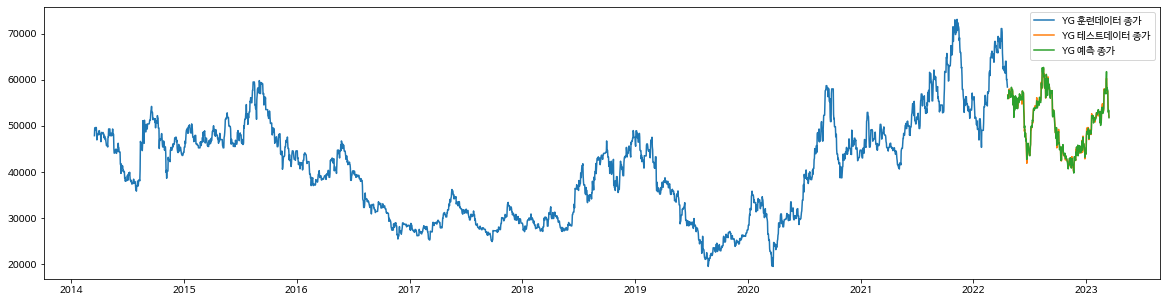

In [53]:
plt.figure(figsize=(20,5))
plt.plot(yg_train.iloc[:,0],label='YG 훈련데이터 종가')
plt.plot(yg_test.iloc[:,0],label='YG 테스트데이터 종가')
plt.plot(yg_predict,label='YG 예측 종가')
plt.legend()
plt.savefig('YG주가데이터xgboost_그리드서치.png')
plt.show()

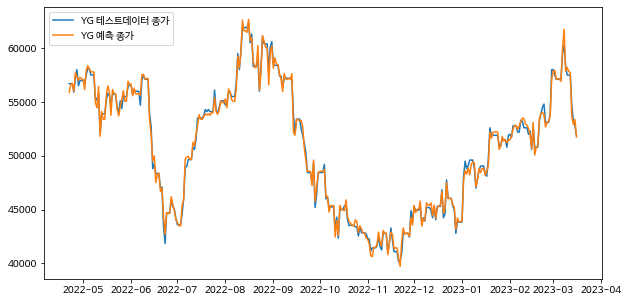

In [54]:
plt.figure(figsize=(10,5))
plt.plot(yg_test.iloc[:,0],label='YG 테스트데이터 종가')
plt.plot(yg_predict,label='YG 예측 종가')
plt.legend()
plt.savefig('YG주가데이터xgboost_그리드서치확대.png')
plt.show()